# Analysis of IMB

This notebook performs data analysis of the csv files created by running the IMB benchmark

In [1]:
import csv

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re

In [3]:
results = {
    "Cloud_IMB":[],
    "SCARF_IMB":[]
}

for dataName in results:
    with open("../" + dataName + "/out.csv", "r") as fHandle:
        reader = csv.reader(fHandle)  # create an iterator over each row
        headers = next(reader) # the headers are the first line
        latencyIndex = headers.index("Latency")  #
        bandwidthIndex = headers.index("0")  # after hear, all are the bandwidths
        thisMessageSizes = [int(el) for el in headers[bandwidthIndex + 1:]]
        try:
            if messageSizes != [int(el) for el in headers[bandwidthIndex + 1:]]:
                raise ValueError("Different message sizes")
        except NameError: # if messageSizes hasn't been set yet
            messageSizes = thisMessageSizes
        for row in reader:
            thisRow = dict((header, row[index]) for index, header in enumerate(headers))
            thisRow["Bandwidths"] = [float(el) for el in row[bandwidthIndex + 1:]]
            thisRow["maxBandwidths"] = max(thisRow["Bandwidths"])
            thisRow["meanBandwidths"] = sum(thisRow["Bandwidths"]) / len(thisRow["Bandwidths"])
            results[dataName].append(thisRow)
print("Message Sizes:")
print(messageSizes)
print()
for dataName in results:
    print(dataName)
    print("1st latency:        {}".format(results[dataName][0]["Latency"]))
    print("max bandwidth:      {}".format(max(test["maxBandwidths"] for test in results[dataName])))
    print("1st bandwidths(10): {}".format(results[dataName][0]["Bandwidths"][0:10]))
    print("Headers:            {}".format(results[dataName][0].keys()))
    print()
        

Message Sizes:
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216]

Cloud_IMB
1st latency:        0.27
max bandwidth:      7717.49
1st bandwidths(10): [2.29, 4.62, 10.67, 19.84, 39.89, 79.16, 143.3, 265.7, 461.57, 727.14]
Headers:            dict_keys(['4194304', '524288', '256', '8192', '4', '65536', 'Number of Hosts', '1024', '2097152', 'maxBandwidths', '1048576', 'Latency', '1', 'File Name', 'meanBandwidths', '0', '8', '131072', '16384', '32768', 'Bandwidths', '4096', '128', '2', '262144', '8388608', '16', '64', '2048', '512', '32', '16777216'])

SCARF_IMB
1st latency:        0.23
max bandwidth:      9149.72
1st bandwidths(10): [3.98, 7.96, 15.96, 31.86, 63.71, 126.61, 261.36, 311.81, 597.61, 1037.75]
Headers:            dict_keys(['4194304', 'Bandwidths', 'Max Threads', '32768', 'Number of Hosts', '1024', '1048576', 'Latency', '1', 'File Name', 'meanBandwidths', '16777216', '13107

In [7]:
results["SCARF_IMB_2"]= []
dataName = "SCARF_IMB_2"
with open("../SCARF_IMB/out_map_cpu.csv", "r") as fHandle:
        reader = csv.reader(fHandle)  # create an iterator over each row
        headers = next(reader) # the headers are the first line
        latencyIndex = headers.index("Latency")  #
        bandwidthIndex = headers.index("0")  # after hear, all are the bandwidths
        thisMessageSizes = [int(el) for el in headers[bandwidthIndex + 1:]]
        try:
            if messageSizes != [int(el) for el in headers[bandwidthIndex + 1:]]:
                raise ValueError("Different message sizes")
        except NameError: # if messageSizes hasn't been set yet
            messageSizes = thisMessageSizes
        for row in reader:
            thisRow = dict((header, row[index]) for index, header in enumerate(headers))
            thisRow["Bandwidths"] = [float(el) for el in row[bandwidthIndex + 1:]]
            thisRow["maxBandwidths"] = max(thisRow["Bandwidths"])
            thisRow["meanBandwidths"] = sum(thisRow["Bandwidths"]) / len(thisRow["Bandwidths"])
            results[dataName].append(thisRow)

In [5]:
import datetime

# Do cloud dates:
for result in results["Cloud_IMB"]:
    result["Date Run"] = datetime.datetime.strptime(result["File Name"], "%Y%m%d_%H%M%S.out")

# Make SCARF uppercase and map 'X-X' -> 'X'
for result in results["SCARF_IMB"]:
    result["Host Groups"] = result["Host Groups"].split("-")[0].upper()
    
# Make SCARF uppercase and map 'X-X' -> 'X'
for result in results["SCARF_IMB_2"]:
    result["Host Groups"] = result["Host Groups"].split("-")[0].upper()
    

['SHM', 'SHM-IBV', 'SHM-TCP']


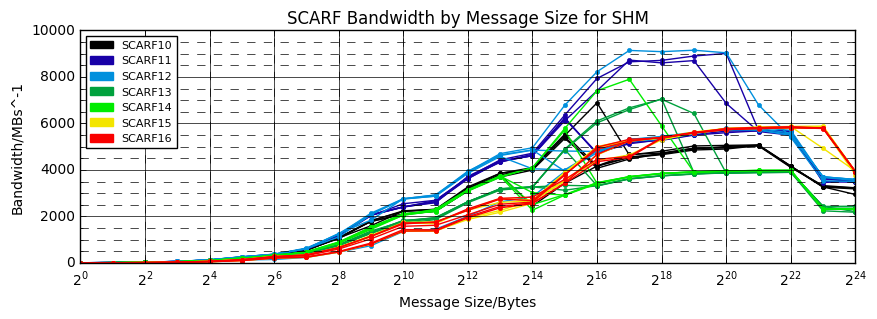

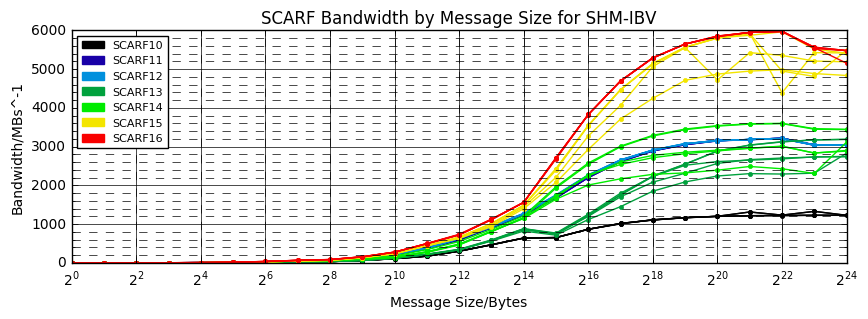

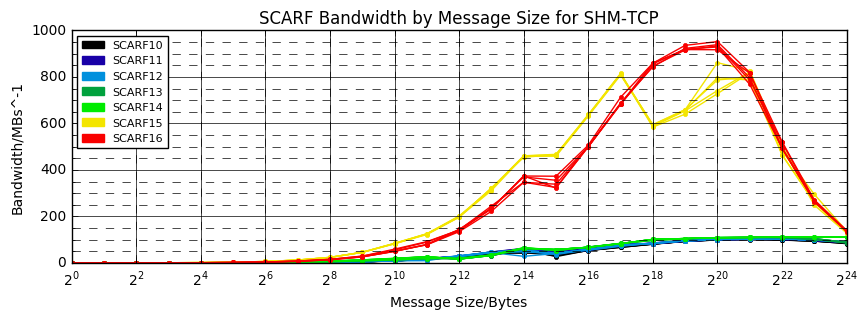

In [8]:
def plotScarfBandwidth():
    protocols = sorted(set(row["Protocols Seen"] for row in results["SCARF_IMB"]))
    print(protocols)
    for prot in protocols:
        res = [row for row in results["SCARF_IMB"] if row["Protocols Seen"] == prot]
        hostgroups = sorted(set(row["Host Groups"] for row in res))
        clrMap = plt.get_cmap("nipy_spectral")
        legendHandles = []
        for index, hostgroup in enumerate(hostgroups):
            clr = clrMap(index / len(hostgroups))
            legendHandles.append(mpatches.Patch(color=clr, label=hostgroup))
        for index, row in enumerate(sorted(res, key=lambda el: el["File Name"])):
            band = row["Bandwidths"]
            clr = clrMap(hostgroups.index(row["Host Groups"]) / len(hostgroups))
            clr = (clr[0], clr[1], clr[2], 1)
            plt.plot(messageSizes, band, color=clr, marker=".", linestyle="-")
            nodeNumbers = ",".join(re.findall("cn\d+", row["Hosts Used"]))
            # legendHandles.append(mpatches.Patch(color=clr, label=nodeNumbers))
        plt.legend(handles=legendHandles, loc=2, ncol=1, fontsize=8)
        plt.rcParams["figure.figsize"] = (10, 3)
        plt.xscale("log", basex=2)
        plt.title("SCARF Bandwidth by Message Size for {}".format(prot))
        plt.xlabel("Message Size/Bytes")
        plt.ylabel("Bandwidth/MBs^-1")
        plt.grid(True, which="minor", linestyle="--")
        plt.grid(True, which="major", linestyle="-")
        plt.minorticks_on()
        plt.show()

plotScarfBandwidth()


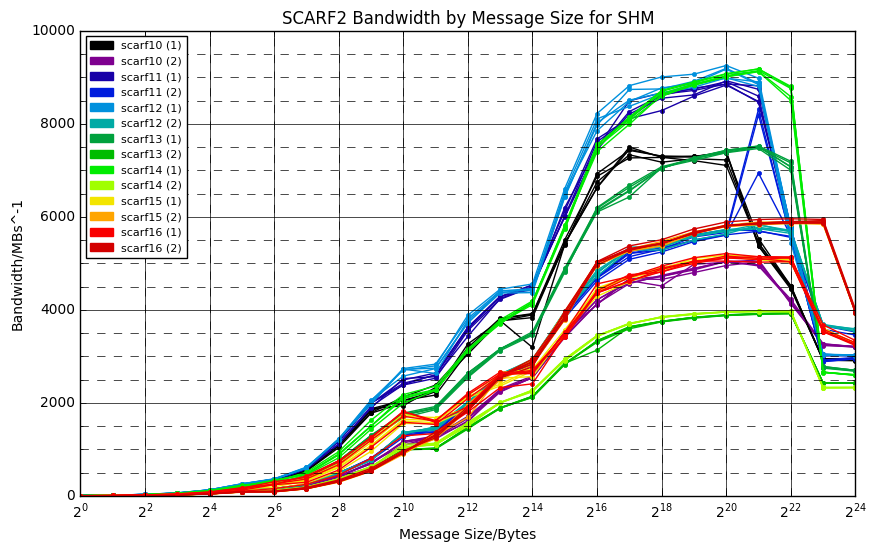

In [23]:
def plotScarfBandwidth2():
    protocols = sorted(set(row["CPUs"] for row in results["SCARF_IMB_2"]))

    hostgroups = sorted(set(row["Host Groups"] for row in results["SCARF_IMB_2"]))
    clrMap = plt.get_cmap("nipy_spectral")
    legendHandles = []
    for index, hostgroup in enumerate(hostgroups):
        for cpus in range(2):
            clr = clrMap((index * 2 + cpus) / (len(hostgroups) * 2))
            legendHandles.append(mpatches.Patch(color=clr, label="{} ({})".format(hostgroup, cpus + 1)))
    for index, row in enumerate(sorted(results["SCARF_IMB_2"], key=lambda el: el["File Name"])):
        band = row["Bandwidths"]
        clr = clrMap((hostgroups.index(row["Host Groups"]) * 2 + int(row["CPUs"]) - 1) / (len(hostgroups) * 2))
        clr = (clr[0], clr[1], clr[2], 1)
        plt.plot(messageSizes, band, color=clr, marker=".", linestyle="-")
        nodeNumbers = ",".join(re.findall("cn\d+", row["Hosts Used"]))
        # legendHandles.append(mpatches.Patch(color=clr, label=nodeNumbers))
    plt.legend(handles=legendHandles, loc=2, ncol=1, fontsize=8)
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.xscale("log", basex=2)
    plt.title("SCARF2 Bandwidth by Message Size for SHM")
    plt.xlabel("Message Size/Bytes")
    plt.ylabel("Bandwidth/MBs^-1")
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", linestyle="-")
    plt.minorticks_on()
    plt.show()

plotScarfBandwidth2()

['1', '2']


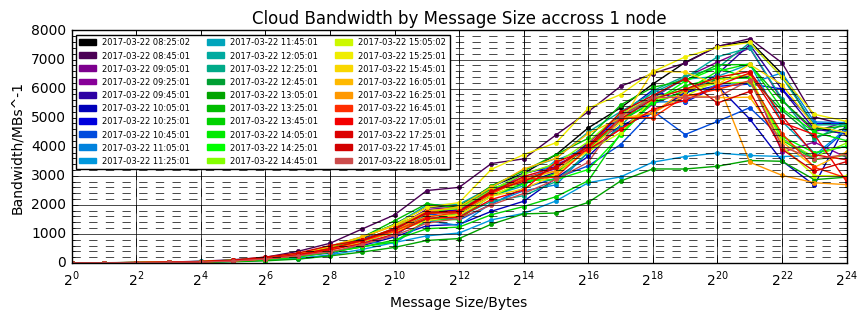

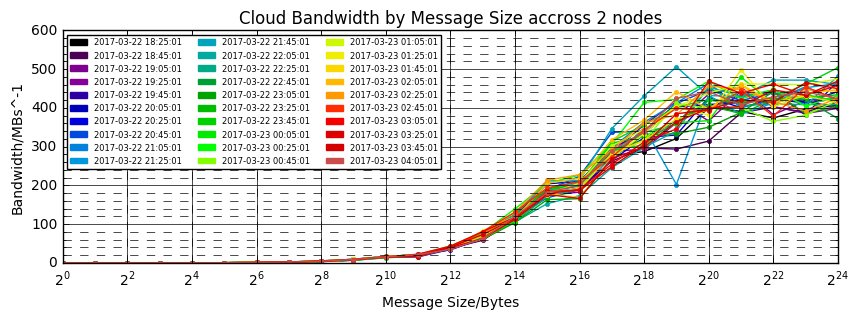

In [8]:
def plotCloudBandwidth():
    numHostsSet = sorted(set(row['Number of Hosts'] for row in results["Cloud_IMB"]))
    print(numHostsSet)
    for numHosts in numHostsSet:
        res = [row for row in results["Cloud_IMB"] if row['Number of Hosts'] == numHosts]
        clrMap = plt.get_cmap("nipy_spectral")
        legendHandles = []
        for index, row in enumerate(sorted(res, key=lambda el: el["Date Run"])):  # sort by date run
            band = row["Bandwidths"]
            clr = clrMap(index / len(res))
            clr = (clr[0], clr[1], clr[2], 1)
            plt.plot(messageSizes, band, color=clr, marker=".", linestyle="-")
            legendHandles.append(mpatches.Patch(color=clr, label=row["Date Run"]))
        plt.legend(handles=legendHandles, loc=2, ncol=3, fontsize=6)
        plt.rcParams["figure.figsize"] = (10, 3)
        plt.xscale("log", basex=2)
        titleEnd = "1 node" if numHosts == "1" else "{} nodes".format(numHosts)
        plt.title("Cloud Bandwidth by Message Size accross " + titleEnd)
        plt.xlabel("Message Size/Bytes")
        plt.ylabel("Bandwidth/MBs^-1")
        plt.grid(True, which="minor", linestyle="--")
        plt.grid(True, which="major", linestyle="-")
        plt.minorticks_on()
        plt.show()

plotCloudBandwidth()

['1', '2']


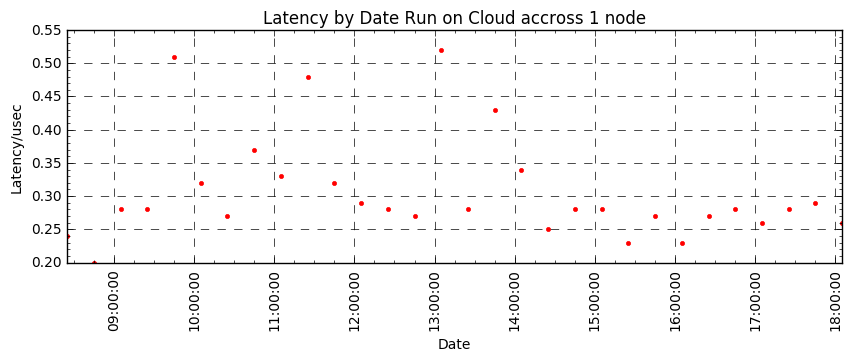

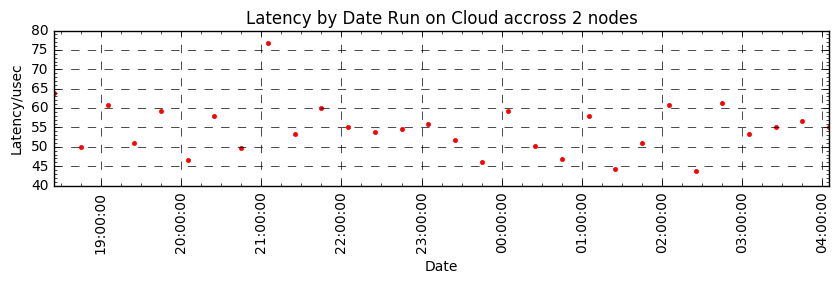

In [9]:
def plotCloudLatencies():
    numHostsSet = sorted(set(row['Number of Hosts'] for row in results["Cloud_IMB"]))
    print(numHostsSet)
    
    for index, numHosts in enumerate(numHostsSet):
        res = [row for row in results["Cloud_IMB"] if row['Number of Hosts'] == numHosts]
        plt.plot([row["Date Run"] for row in res], 
                 [row["Latency"] for row in res], "r.")
        plt.xticks(rotation='vertical')
        plt.rcParams["figure.figsize"] = (10,2)
        titleEnd = "1 node" if numHosts == "1" else "{} nodes".format(numHosts)
        plt.title("Latency by Date Run on Cloud accross " + titleEnd)
        plt.ylabel("Latency/usec")
        plt.xlabel("Date")
        #plt.grid(True, which="minor", linestyle="-")
        plt.grid(True, which="major", linestyle="--")
        plt.minorticks_on()
        plt.show()

plotCloudLatencies()

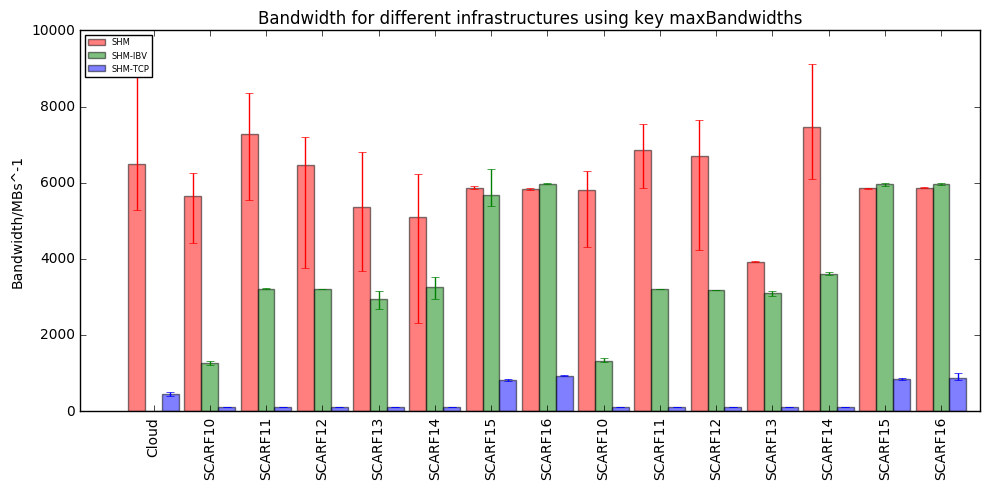

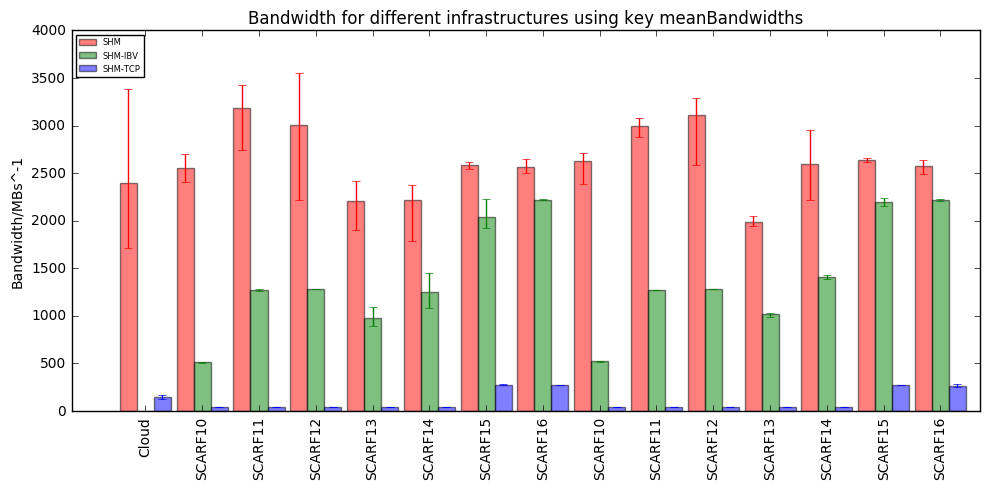

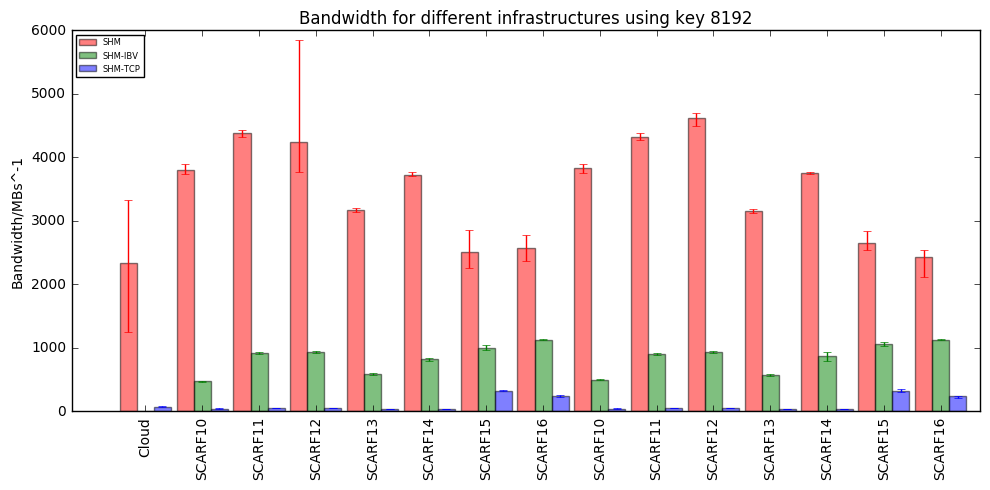

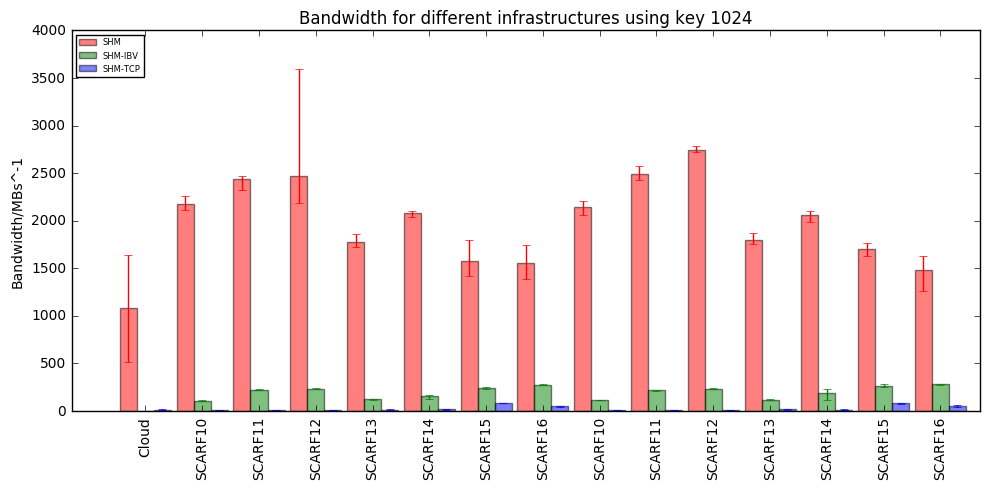

In [17]:
def plotBandwidths(BW_KEY="maxBandwidths"):
    
    
    yValues = {"SHM":[], "SHM-TCP":[], "SHM-IBV":[]}
    yTopError = {"SHM":[], "SHM-TCP":[], "SHM-IBV":[]}
    yBottomError = {"SHM":[], "SHM-TCP":[], "SHM-IBV":[]}
    
    def addBarData(listOfBandwidths, label):
        listOfBandwidths = [float(val) for val in listOfBandwidths]
        nonlocal yValues
        nonlocal yTopError
        nonlocal yBottomError
        avg = sum(listOfBandwidths) / len(listOfBandwidths)
        yValues[label].append(avg)
        yTopError[label].append(max(listOfBandwidths) - avg)
        yBottomError[label].append(avg - min(listOfBandwidths))
    
    
    # Add the cloud split into number of hosts
    addBarData([row[BW_KEY] for row in results["Cloud_IMB"] if row["Number of Hosts"] == "1"], "SHM")
    addBarData([row[BW_KEY] for row in results["Cloud_IMB"] if row["Number of Hosts"] == "2"], "SHM-TCP")
    addBarData([0], "SHM-IBV")

    xValues = ["Cloud"]
    
    
    # Add the SCARF split into host group and number of hosts
    for hostgroup in sorted(set(row["Host Groups"] for row in results["SCARF_IMB"])):
        xValues += [hostgroup]
        for prot in sorted(set(row["Protocols Seen"] for row in results["SCARF_IMB"])):
            addBarData([row[BW_KEY] for row in results["SCARF_IMB"] 
                        if hostgroup in row["Host Groups"] and prot == row["Protocols Seen"]], prot)
            
    # Add the SCARF2 split into host group and number of hosts
    for hostgroup in sorted(set(row["Host Groups"] for row in results["SCARF_IMB_2"])):
        xValues += [hostgroup]
        for prot in sorted(set(row["Protocols Seen"] for row in results["SCARF_IMB_2"])):
            addBarData([row[BW_KEY] for row in results["SCARF_IMB_2"] 
                        if hostgroup in row["Host Groups"] and prot == row["Protocols Seen"]], prot)
    
    index = np.arange(len(xValues)) - 1
    
    bar_width=0.3
    clrs = ["r", "g", "b"]
    
    for i, (label, yVals) in enumerate(yValues.items()):
        plt.bar(index + i * bar_width, yValues[label], bar_width, align='center', color=clrs[i], alpha=0.5, label=label)
        plt.errorbar(index + i * bar_width, yValues[label], yerr=[yTopError[label], yBottomError[label]], linestyle=" ", 
                     color=clrs[i])
    
    plt.xticks(index + bar_width, xValues, rotation="vertical")
    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.ylabel("Bandwidth/MBs^-1")
    # plt.yscale("log")
    plt.title('Bandwidth for different infrastructures using key {}'.format(BW_KEY))

    plt.legend(loc=2, fontsize=6)
    plt.tight_layout()
    
    plt.show()
    


plotBandwidths()
plotBandwidths(BW_KEY="meanBandwidths")
plotBandwidths(BW_KEY="8192")
plotBandwidths(BW_KEY="1024")

In [20]:
def plotLatencies(L_KEY="Latency"):
    
    
    yValues = {"SHM":[], "SHM-TCP":[], "SHM-IBV":[]}
    yTopError = {"SHM":[], "SHM-TCP":[], "SHM-IBV":[]}
    yBottomError = {"SHM":[], "SHM-TCP":[], "SHM-IBV":[]}
    
    def addBarData(listOfBandwidths, label):
        listOfBandwidths = [float(val) for val in listOfBandwidths]
        nonlocal yValues
        nonlocal yTopError
        nonlocal yBottomError
        avg = sum(listOfBandwidths) / len(listOfBandwidths)
        yValues[label].append(avg)
        yTopError[label].append(max(listOfBandwidths) - avg)
        yBottomError[label].append(avg - min(listOfBandwidths))
    
    
    # Add the cloud split into number of hosts
    addBarData([row[L_KEY] for row in results["Cloud_IMB"] if row["Number of Hosts"] == "1"], "SHM")
    addBarData([row[L_KEY] for row in results["Cloud_IMB"] if row["Number of Hosts"] == "2"], "SHM-TCP")
    addBarData([0], "SHM-IBV")

    xValues = ["Cloud"]
    
    
    # Add the SCARF split into host group and number of hosts
    for hostgroup in sorted(set(row["Host Groups"] for row in results["SCARF_IMB"])):
        xValues += [hostgroup]
        for prot in sorted(set(row["Protocols Seen"] for row in results["SCARF_IMB"])):
            addBarData([row[L_KEY] for row in results["SCARF_IMB"] 
                        if hostgroup in row["Host Groups"] and prot == row["Protocols Seen"]], prot)
    # Add the SCARF split into host group and number of hosts
    for hostgroup in sorted(set(row["Host Groups"] for row in results["SCARF_IMB_2"])):
        xValues += [hostgroup]
        for prot in sorted(set(row["Protocols Seen"] for row in results["SCARF_IMB_2"])):
            addBarData([row[L_KEY] for row in results["SCARF_IMB_2"] 
                        if hostgroup in row["Host Groups"] and prot == row["Protocols Seen"]], prot)
    
    index = np.arange(len(xValues)) - 1
    
    bar_width=0.3
    clrs = ["r", "g", "b"]
    
    for i, (label, yVals) in enumerate(yValues.items()):
        plt.bar(index + i * bar_width, yValues[label], bar_width, align='center', color=clrs[i], alpha=0.5, label=label)
        plt.errorbar(index + i * bar_width, yValues[label], yerr=[yTopError[label], yBottomError[label]], linestyle=" ", 
                     color=clrs[i])
    
    plt.xticks(index + bar_width, xValues, rotation="vertical")
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.ylabel("Latency/usec")
    #plt.yscale("log")
    plt.title('Latency for different infrastructures')

    plt.legend(loc=2, fontsize=6)
    plt.tight_layout()
    
    plt.show()

plotLatencies()

ValueError: incompatible sizes: argument 'height' must be length 15 or scalar

In [29]:
for hostgroup in sorted(set(row["Host Groups"] for row in results["SCARF_IMB"])):
    test1 = set(hn for result in results["SCARF_IMB"] for hn in re.findall(r"cn\d\d\d", result["Hosts Used"]) if hostgroup == result["Host Groups"])
    test2 = set(hn for result in results["SCARF_IMB_2"] for hn in re.findall(r"cn\d\d\d", result["Hosts Used"]) if hostgroup == result["Host Groups"])
    print(hostgroup)
    print(" - shared", test1 & test2)
    print(" - unique to run1", test1 - test2)
    print(" - unique to run2", test2 - test1)
    

SCARF10
 - shared {'cn059', 'cn076', 'cn079', 'cn052', 'cn071', 'cn069'}
 - unique to run1 {'cn080', 'cn068', 'cn053', 'cn078', 'cn074', 'cn067'}
 - unique to run2 {'cn057'}
SCARF11
 - shared {'cn350', 'cn356', 'cn342', 'cn357'}
 - unique to run1 {'cn349', 'cn355'}
 - unique to run2 set()
SCARF12
 - shared {'cn381', 'cn366'}
 - unique to run1 {'cn379', 'cn369', 'cn374', 'cn375', 'cn365', 'cn364', 'cn373', 'cn363', 'cn380'}
 - unique to run2 set()
SCARF13
 - shared {'cn434'}
 - unique to run1 {'cn440', 'cn451', 'cn395', 'cn391', 'cn412', 'cn427', 'cn452', 'cn408', 'cn445', 'cn463', 'cn429', 'cn460', 'cn464', 'cn421', 'cn419', 'cn447', 'cn411', 'cn443', 'cn423', 'cn431', 'cn449', 'cn399', 'cn446'}
 - unique to run2 {'cn393', 'cn390', 'cn437', 'cn401', 'cn453', 'cn410', 'cn433', 'cn450', 'cn409', 'cn404'}
SCARF14
 - shared {'cn267'}
 - unique to run1 {'cn271', 'cn290', 'cn269', 'cn282', 'cn310', 'cn286', 'cn288', 'cn260', 'cn275', 'cn299', 'cn292', 'cn297', 'cn280', 'cn284', 'cn256', 'cn3

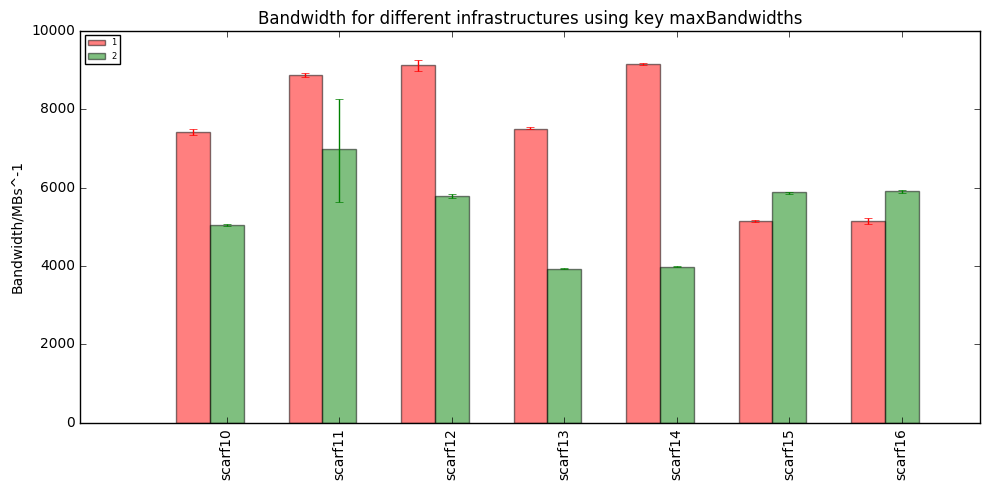

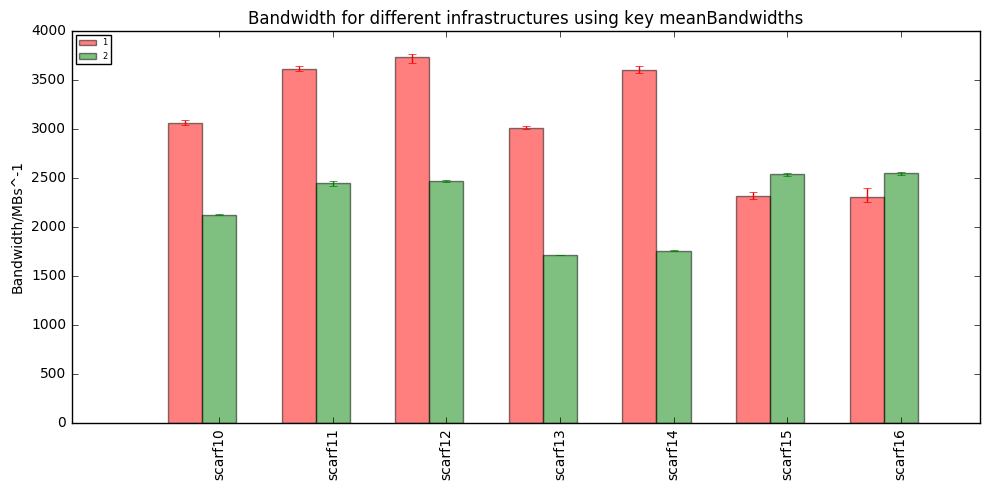

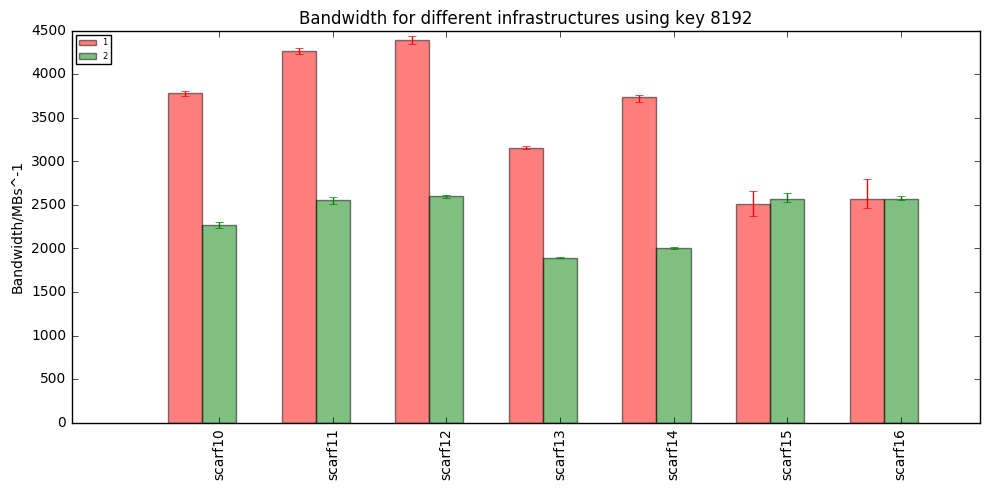

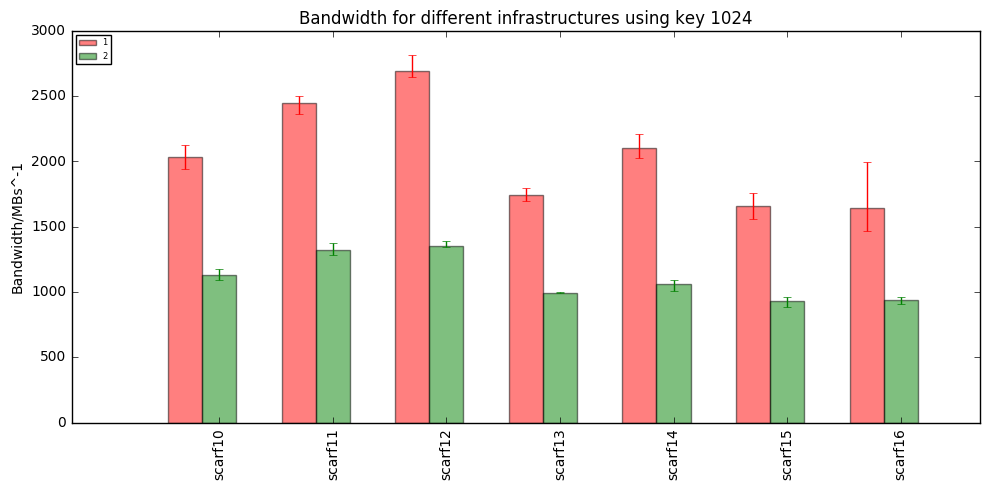

In [19]:
def plotBandwidths(BW_KEY="maxBandwidths"):
    
    xValues = []
    yValues = {"1":[], "2":[]}
    yTopError = {"1":[], "2":[]}
    yBottomError = {"1":[], "2":[]}
    
    def addBarData(listOfBandwidths, label):
        listOfBandwidths = [float(val) for val in listOfBandwidths]
        nonlocal yValues
        nonlocal yTopError
        nonlocal yBottomError
        avg = sum(listOfBandwidths) / len(listOfBandwidths)
        yValues[label].append(avg)
        yTopError[label].append(max(listOfBandwidths) - avg)
        yBottomError[label].append(avg - min(listOfBandwidths))
    
    
  
    
    
    # Add the SCARF split into host group and number of hosts
    for hostgroup in sorted(set(row["Host Groups"] for row in results["SCARF_IMB_2"])):
        xValues += [hostgroup]
        for cpus in ["1", "2"]:
            addBarData([row[BW_KEY] for row in results["SCARF_IMB_2"] 
                        if hostgroup in row["Host Groups"] and cpus == row["CPUs"]], cpus)
            

    
    index = np.arange(len(xValues)) - 1
    
    bar_width=0.3
    clrs = ["r", "g", "b"]
    
    for i, (label, yVals) in enumerate(yValues.items()):
        plt.bar(index + i * bar_width, yValues[label], bar_width, align='center', color=clrs[i], alpha=0.5, label=label)
        plt.errorbar(index + i * bar_width, yValues[label], yerr=[yTopError[label], yBottomError[label]], linestyle=" ", 
                     color=clrs[i])
    
    plt.xticks(index + bar_width, xValues, rotation="vertical")
    
    plt.rcParams["figure.figsize"] = (10,5)
    plt.ylabel("Bandwidth/MBs^-1")
    # plt.yscale("log")
    plt.title('Bandwidth for different infrastructures using key {}'.format(BW_KEY))

    plt.legend(loc=2, fontsize=6)
    plt.tight_layout()
    
    plt.show()
    


plotBandwidths()
plotBandwidths(BW_KEY="meanBandwidths")
plotBandwidths(BW_KEY="8192")
plotBandwidths(BW_KEY="1024")